# Structure Representation Computation from Audio Input

## > Library importing

In [1]:
#Computation
import numpy as np
import scipy
import matplotlib.pyplot as plt

#Data Processing
import sklearn.cluster

#Audio
import librosa
from librosa import display

#System
import glob
import os

## > Loading audio

In [2]:
#Choose directory containing audiofiles
directory = '../../Music'

In [4]:
#Read all paths in specified directory
all_filepaths = []
for root, dirs, files in os.walk(directory):
        for name in files:
            if (('.wav' in name) or ('.aif' in name) or ('.mp3' in name)):
                filepath = os.path.join(root, name)
                all_filepaths.append(filepath)

#Load all audiofiles and store in array
all_audio = []
for i in range(len(all_filepaths)):
    y, sr = librosa.load(filepath, sr=22050, mono=True)
    all_audio.append((y, sr))
    sys.stdout.write("\rLoaded %i/%s pieces." % ((i+1), str(len(all_filepaths))))
    sys.stdout.flush()


Loaded 8/8 pieces.

## > Self Similarity for Repetitions

### >> Single-Feature Self Similarity Matrix (no feature fusion on this script)

In [5]:
#Choose pipeline of primary features to use to compute self similarity
#Options: {stft, log_power_CQT, perceptually_weighted_CQT, mel_spectrogram}
spectral_representations = ['log_power_CQT'] 

In [6]:
#Matrix of shape (i,j) where i indexes the audio files and j indexes the features
Srep = []
for audiofile in range(len(all_filepaths)):
    for spec_rep in spectral_representations:
        spec_reps = []
        if spec_rep=='stft':
            spec_reps.append(stft)
        if spec_rep=='log_power_CQT':
            #Parametrs for log-power CQT computation
            bins_per_oct = 12*3
            n_oct = 7
            C = librosa.amplitude_to_db(librosa.cqt(y=y, sr=sr, bins_per_octave=bins_per_oct, n_bins=n_oct*bins_per_oct))
            spec_reps.append(C)
        if spec_rep=='perceptually_weighted_CQT':
            spec_reps.append(pwC)
        if spec_rep=='mel_spectrogram':
            spec_reps.append(melspec)
        Srep.append(spec_reps)
    sys.stdout.write("\rComputed spectral representations for %i/%s pieces." % ((audiofile+1), str(len(all_filepaths))))
    sys.stdout.flush()

Computed spectral representations for 8/8 pieces.

(8, 1, 252, 18356)


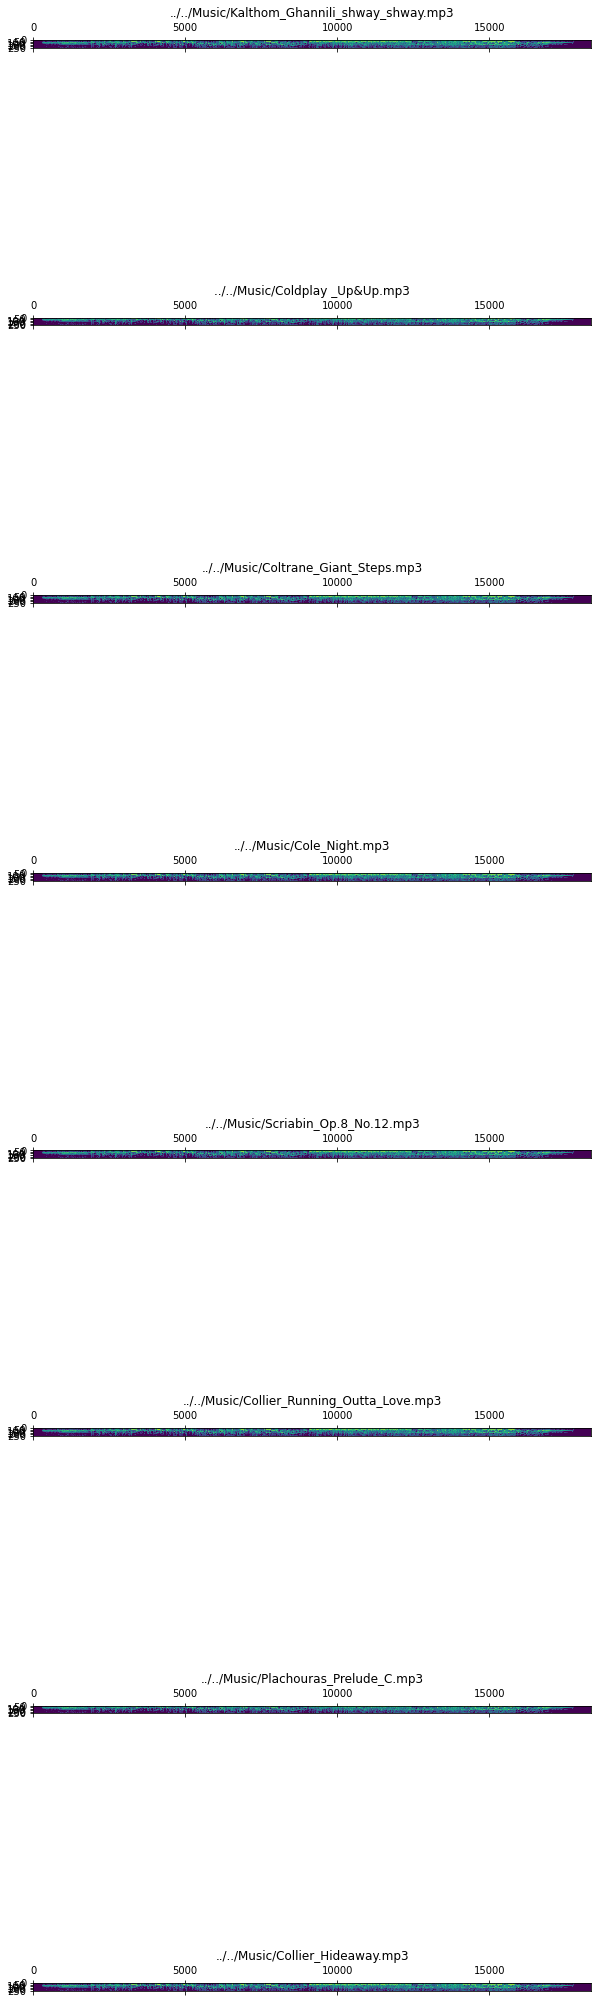

In [7]:
#Plotting (needs adjustment based on pipeline choice, made for the log-power CQT from the first 8 pieces for now)
fig, axs = plt.subplots(8, figsize=(10, 40))
for i in range(8):
    axs[i].matshow(Srep[i][0])
    axs[i].set_title(all_filepaths[i])
    # plt.tight_layout()

### >> Dimensionality Reduction

In [11]:
#Select one dimensionality reduction method out of {none, beat-synchronization, 2d-interpolation}
dim_reduction = 'beat-synchronization'

In [12]:
#Replace all spectral representations with their dimensionality reduced version
for audiofile in range(len(all_filepaths)):
    tempo, beats = librosa.beat.beat_track(y=all_audio[audiofile][0], sr=all_audio[audiofile][1], trim=False)

    if dim_reduction=='none':
        break
    if dim_reduction=='beat-synchronization':
        for spec_rep in range(len(Srep[audiofile])):
            Srep[audiofile][spec_rep] = librosa.util.sync(all_spectral_representations[audiofile][spec_rep], beats, aggregate=np.median)

    if dim_reduction=='2d_interpolation': #NEEDS TO BE EVALUATED (is this working as expected, do other methods of downsampling make more sense?)
        for spec_rep in range(len(Srep[audiofile])):
            #Compute interpolation function
            Xindex = np.linspace(0, 1, num=Srep[audiofile][spec_rep].shape[0])
            Yindex = np.linspace(0, 1, num=Srep[audiofile][spec_rep].shape[1])
            f = interp2d(Xindex, Yindex, num=Srep[audiofile][spec_rep].flatten(), kind='linear')
            #Generate new ranges
            Xindex_ds = np.linspace(0, 1, num=Srep[audiofile][spec_rep].shape[0]/50)
            Yindex_ds = np.linspace(0, 1, num=Srep[audiofile][spec_rep].shape[1]/50)
            #Resample
            Srep[audiofile][spec_rep] = np.reshape(f(Xindex_ds, Yindex_ds), (shape[0]/50, shape[1]/50))
    sys.stdout.write("\rDownlsampled %i/%s pieces." % ((audiofile+1), str(len(all_filepaths))))
    sys.stdout.flush()

NameError: name 'Srep' is not defined

In [ ]:
#Plotting

### >> Short-term History Embedding of spectral representation

In [ ]:
#Choose number of lag steps
n_steps = 4

In [ ]:
Cstack = librosa.feature.stack_memory(Csync, 4)

### >> Weighted Recurrence Matrix

### >> Timelag filter / Short-term History Embedding(?) / Windowed Majority Vote